In [1]:
# DIRECTORY SET
import os
import sys
from pathlib import Path
base_dir=Path(os.getcwd()).parent.parent
os.chdir(base_dir)
print(os.getcwd())

# ENVIRONMENT VARIABLES
import dotenv
dotenv.load_dotenv()

# DJANGO SETUP
import django
sys.path.append(os.path.abspath(''))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "serverproject.settings")
django.setup()

# Import async modules
import asyncio
from asgiref.sync import sync_to_async

# Import display modules
from IPython.display import display, Markdown

# Import other modules
import faiss

# import reloading
from importlib import reload

d:\DestinyFolder\DestinyRecaps\DestinyRecapsApi\serverproject


In [2]:
%load_ext autoreload
%autoreload 2

from destinyapp.models import StreamRecapData

from destinyapp.customlibrary import services
from destinyapp.customlibrary import utils

In [11]:
# Specific imports
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from bs4 import BeautifulSoup
from collections import defaultdict
import textwrap
import json

In [4]:
video_id="3kJr7ODrwNw"

video_id="3CkGjIxIZlI"
# load the video data
stream_recap_data=await utils.get_recap_data(video_id)

In [5]:
test_text_chunks=await services.visualization.create_text_chunks(stream_recap_data.transcript, 0)

Number of chunks:  463


In [6]:
chunk_batches=await services.visualization.generate_text_chunk_batches(test_text_chunks)

In [7]:
topic_annotations_str=await services.visualization.annotate_major_minor_topics(stream_recap_data.recap)

Cost:  0.0075840000000000005


In [8]:
print(topic_annotations_str)

Major Topics:

Category: 'Chevron Deference Doctrine' | Context: Discussion of the Supreme Court's recent decision overturning the Chevron deference doctrine, its implications for administrative law, and the debate surrounding judicial deference to administrative agencies.

Category: 'Gun Control and Regulations' | Context: Detailed examination of bump stocks, their functionality, legal classification, and the broader debate on gun control laws, including Destiny's views on machine gun regulations.

Category: 'American Identity and Political Division' | Context: Reflection on core American values, current political divisions particularly regarding Trump supporters, and concerns about some conservatives departing from traditional American values.

Category: 'Legal and Constitutional Issues' | Context: Analysis of Supreme Court decisions, discussions on stare decisis, the role of courts versus agency expertise in interpreting laws, and examination of separation of powers.

Minor Topics:


In [55]:
print(topic_annotations_str2)

Main Topics:
Category: Legal and Constitutional Issues | Context: Discussion of the Chevron deference doctrine, its recent overturning by the Supreme Court, and implications for administrative law and judicial review of agency decisions.

Category: Political and Social Commentary | Context: Reflections on current political divisions in the US, concerns about departures from traditional American values, and debates about national identity.

Category: Firearms Regulation | Context: Analysis of bump stocks, their legal classification, and broader discussions about machine gun regulations and the Second Amendment.

Minor topics:
- Statutory interpretation and the role of courts vs. agencies
- Separation of powers and checks and balances in government
- Technical discussions on protein synthesis and biological definitions
- Historical perspectives on government distrust and national traumas
- Debates about the events of January 6th and their classification
- Discussions on the mechanics and

In [58]:
topic_annotations_str=topic_annotations_str2
temp_annotation_list=topic_annotations_str.split("Category: ")
major_topics=[]
for temp_annotation in temp_annotation_list:
    if " | Context:" in temp_annotation:
        major_topic=temp_annotation.split(" | Context:")[0]
        major_topics.append(major_topic)

minor_topics=[]
if "Minor Topics:" in topic_annotations_str:
    temp_minor_topics=topic_annotations_str.split("Minor Topics:\n")[-1].split("\n- ")
elif "Minor topics:" in topic_annotations_str:
    temp_minor_topics=topic_annotations_str.split("Minor topics:\n")[-1].split("\n- ")
for i in range(len(temp_minor_topics)):
    minor_topic=temp_minor_topics[i].strip()
    if minor_topic!="":
        minor_topics.append(minor_topic)

print(major_topics)
print(minor_topics)

['Legal and Constitutional Issues', 'Political and Social Commentary', 'Firearms Regulation']
['- Statutory interpretation and the role of courts vs. agencies', 'Separation of powers and checks and balances in government', 'Technical discussions on protein synthesis and biological definitions', 'Historical perspectives on government distrust and national traumas', 'Debates about the events of January 6th and their classification', 'Discussions on the mechanics and functionality of firearms', 'Reflections on American identity and core values', 'Analysis of specific Supreme Court cases and decisions', 'Exploration of legal concepts like stare decisis and judicial review']


In [54]:
responses, annotated_results=await services.visualization.annotate_all_batches(chunk_batches, topic_annotations_str)

Cost:  0.0012032500000000001
Cost:  0.0012617499999999999
Cost:  0.00125425
Cost:  0.00128875
Cost:  0.00121975
Cost:  0.0013195
Cost:  0.00134675
Cost:  0.0013714999999999999
Cost:  0.001361
Cost:  0.0013717500000000001
Cost:  0.0013800000000000002
Cost:  0.0013885
Cost:  0.0013915
Cost:  0.0013042499999999999
Cost:  0.001232
Cost:  0.000512
Cost:  0.0011164999999999999
Cost:  0.001225
Cost:  0.0012317500000000002
Cost:  0.001311
Cost:  0.0012997500000000001
Cost:  0.00128325
Cost:  0.0013930000000000001
Cost:  0.001316
Cost:  0.0013795
Fail Retry count:  1
Fail Retry count:  1
Fail Retry count:  1
Fail Retry count:  1
Fail Retry count:  1
Fail Retry count:  1
Fail Retry count:  1
Fail Retry count:  1
Fail Retry count:  1
Fail Retry count:  1
Fail Retry count:  1
Fail Retry count:  1
Fail Retry count:  1
Fail Retry count:  1
Fail Retry count:  1
Cost:  0.00122075
Cost:  0.001226
Cost:  0.001192
Cost:  0.0013597499999999998
Cost:  0.00138125
Cost:  0.0013410000000000002
Cost:  0.001395

In [12]:
# save the annotated results to json
with open("anootation_results.json", "w") as f:
    json.dump(annotated_results, f)

In [13]:
# load the annotated results
anoootated_results=json.load(open("anootation_results.json", "r"))

# Start of Plot 

In [59]:
soup = BeautifulSoup(stream_recap_data.linked_transcript, 'html.parser')
soup_list=soup.find_all('a')

transcript_soup_character_counter=[]
character_count_total=0
temp_time=0
for link in soup_list:
    link_text = link.get_text()
    character_count_total+=len(link_text)

    if link.get('href') is not None:
        temp_time=int(link['href'].split("t=")[-1].split("s")[0])

    transcript_soup_character_counter.append([character_count_total, temp_time])

def find_nearest_time_at_character_count(transcript_soup_character_counter, character_count):
    # middle sort the list to get to the closest character count quickly
    
    l=0
    r=len(transcript_soup_character_counter)-1

    while l<r:
        m=(l+r)//2
        if transcript_soup_character_counter[m][0]<character_count:
            l=m+1
        else:
            r=m

    if l==0:
        return transcript_soup_character_counter[l][1]
    else:
        if abs(transcript_soup_character_counter[l][0]-character_count)<abs(transcript_soup_character_counter[l-1][0]-character_count):
            return transcript_soup_character_counter[l][1]
        else:
            return transcript_soup_character_counter[l-1][1]

In [61]:
color_segment

'Firearms Regulation'

In [63]:
# Get the category segments
category_segments=[]
for i, annotated_segment in enumerate(annotated_results):
    category=annotated_segment["category"]
    content=annotated_segment["annotation"]
    category_segments.append(category)

# Fix min topic annotations
for i, color_segment in enumerate(category_segments):
    if color_segment not in major_topics:
        # print(f"Segment {i}: {color_segment}")
        if (color_segment.lower()=="non categorized") or (color_segment.lower()=="non-categorized"):
            category_segments[i]="non categorized"
        else:
            category_segments[i]="minor topic"


# Get the widths of the segments
category_and_width_segments=[]
for i, annotated_segment in enumerate(category_segments):
    width=find_nearest_time_at_character_count(transcript_soup_character_counter, (i+1)*999)-find_nearest_time_at_character_count(transcript_soup_character_counter, i*1000)
    category_and_width_segments.append([annotated_segment, width])
    print(f"Segment {i}: {annotated_segment}, {width}")



# Create the segments
color_dict={
    "minor topic": "yellow",
    "non categorized": "black"
}
major_topic_color_list=[
    "green",
    "blue",
    "purple",
    "orange",
    "red",
]
for i, mt in enumerate(major_topics):
    color_dict[mt]=major_topic_color_list[i]
segments=[]
for category, width in category_and_width_segments:
    segment={"category": category, "width": width, "color": color_dict[category]}
    segments.append(segment)

# Normalize Widths
total_width=0
total_width_circle=0
for segment in segments:
    total_width+=segment["width"]
    if segment["category"]!="non categorized":
        total_width_circle+=segment["width"]

# Normalize circle widths
circle_mutlipler=total_width/total_width_circle
width_mutliplier=10/total_width
for segment in segments:
    segment["width"]=segment["width"]*width_mutliplier

# get average location of each segment category
category_locations={}
x_location=0
for i, segment in enumerate(segments):
    if segment["category"]!="non categorized":
        temp_locations=category_locations.get(segment["category"], [])
        temp_locations.append(segment["width"]/2+x_location)
        category_locations[segment["category"]]=temp_locations
    else:
        category_locations[segment["category"]]=10

    x_location+=segment["width"]

# for each segment, get the average location of the category
for category_location in category_locations:
    category_locations[category_location]=np.mean(category_locations[category_location])
category_locations=dict(sorted(category_locations.items(), key=lambda item: item[1]))

Segment 0: non categorized, 156
Segment 1: non categorized, 65
Segment 2: non categorized, 140
Segment 3: non categorized, 60
Segment 4: non categorized, 93
Segment 5: non categorized, 131
Segment 6: non categorized, 73
Segment 7: non categorized, 84
Segment 8: non categorized, 125
Segment 9: non categorized, 95
Segment 10: non categorized, 81
Segment 11: non categorized, 80
Segment 12: non categorized, 78
Segment 13: non categorized, 66
Segment 14: non categorized, 59
Segment 15: non categorized, 70
Segment 16: non categorized, 60
Segment 17: non categorized, 49
Segment 18: non categorized, 68
Segment 19: non categorized, 68
Segment 20: non categorized, 79
Segment 21: non categorized, 56
Segment 22: non categorized, 60
Segment 23: non categorized, 91
Segment 24: non categorized, 68
Segment 25: non categorized, 56
Segment 26: non categorized, 51
Segment 27: non categorized, 56
Segment 28: non categorized, 65
Segment 29: non categorized, 51
Segment 30: non categorized, 57
Segment 31: no

In [64]:
# Convert the adjacent segments of the same category into one segment
temp_segments=[]
prev_segment=segments[0]
temp_width=prev_segment["width"]
for segment in segments[1:]:
    if prev_segment["category"]!=segment["category"]:
        prev_segment["width"]=temp_width
        temp_segments.append(prev_segment)
        temp_width=0
    temp_width+=segment["width"]
    prev_segment=segment
if prev_segment["category"]==segment["category"]:
    prev_segment["width"]=temp_width
    temp_segments.append(prev_segment)
segments=temp_segments

# PLOT FUNCTION

Total width: 10.000000000000002
Circle current x: 2.262863393313627
Circle current x: 4.479036468049545
Circle current x: 6.239048480345021
Circle current x: 8.017171373102263


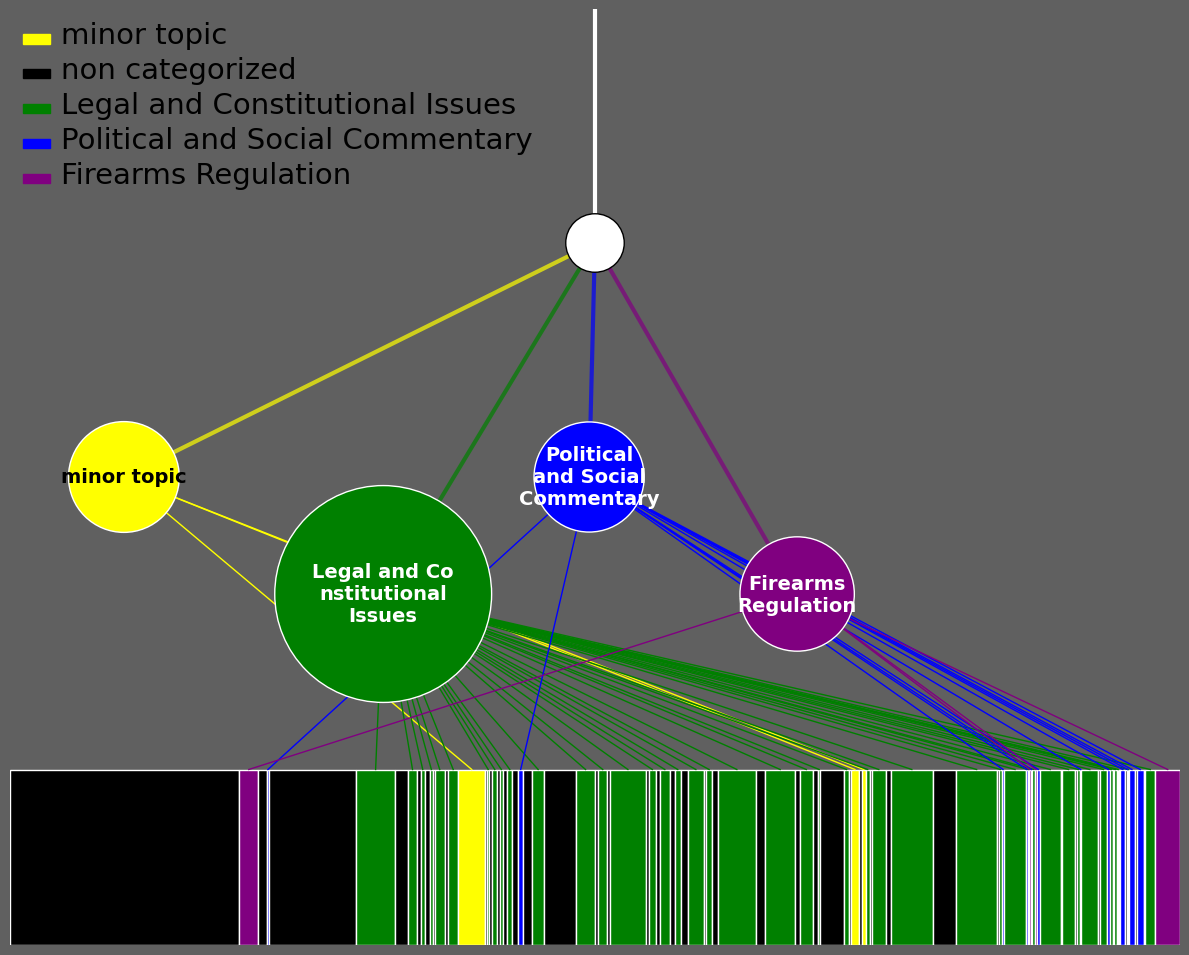

In [65]:
# Create the plot with a specific gray background
fig, ax = plt.subplots(figsize=(12, 10))
fig.patch.set_facecolor('#606060')  # Set figure background to [96, 96, 96]
ax.set_facecolor('#606060')  # Set axes background to [96, 96, 96]
target_plot_width=10


# Plot BAR 
current_x = 0
category_info = defaultdict(lambda: {"total_width": 0, "segments": []})

bar_height = 1.5

for i, segment in enumerate(segments):
    ax.add_patch(plt.Rectangle((current_x, 0), segment['width'], bar_height, 
                               facecolor=segment['color'], edgecolor='white'))
    category_info[segment['category']]['total_width'] += segment['width']
    category_info[segment['category']]['segments'].append((current_x, segment['width']))
    category_info[segment['category']]['color'] = segment['color']
    
    current_x += segment['width']

total_width = current_x
print("Total width:", total_width)







# sort category items by the same order as the category_locations
category_info=dict(sorted(category_info.items(), key=lambda item: category_locations[item[0]]))


# Calculate Circle Padding
circle_zone_size=9
circle_y = 3.5
circle_size_variable = 0.15

current_x=(target_plot_width-circle_zone_size)/2
circle_x_locations={}
total_circles_width=0
def get_circle_width(total_width):
    return (((np.sqrt(total_width) * circle_size_variable)*2)+0.3)

for category, info in category_info.items():
    if category == 'non categorized':
        pass
    else:
        circle_width=get_circle_width(info['total_width'])
        circle_x_locations[category]=circle_width
        total_circles_width+=circle_width
number_of_circles=len(circle_x_locations)
between_circle_padding=(circle_zone_size-total_circles_width)/(number_of_circles+1.15)



alterating_bool=False
vertical_offset=0
circle_centers = []
for category, info in category_info.items():
    if category == 'non categorized':
        continue

    circle_applied_size=get_circle_width(info['total_width'])

    # Calculate x position for the circle (center of all segments of this category)
    circle_x = current_x + circle_applied_size
    if alterating_bool:
        alterating_bool=False
        vertical_offset=-0.5
    else:
        vertical_offset=0.5
        alterating_bool=True

    # Store circle center, color, and size for later use
    circle_size = np.sqrt(info['total_width']) * circle_size_variable
    circle_applied_y=circle_y+vertical_offset
    circle_centers.append((circle_x, circle_applied_y, info['color'], circle_size))
    
    # DRAW LINES
    for segment_start, segment_width in info['segments']:
        segment_center = segment_start + segment_width / 2
        ax.plot([segment_center, circle_x], [bar_height, circle_applied_y], 
                color=info['color'], linewidth=1)  
        
    # PLOT CIRCLES
    circle = plt.Circle((circle_x, circle_applied_y), circle_applied_size, 
                        facecolor=info["color"], edgecolor='white', zorder=10)
    ax.add_artist(circle)

    # PLOT CIRCLE LABELS, set width to circle size and wrap
    text_wrap=textwrap.fill(category, width=12)
    bubble_font_size_text=14
    if info["color"]=="yellow":
        # make it bold and have a white border
        ax.text(circle_x, circle_applied_y, text_wrap, ha='center', va='center', color='black', fontsize=bubble_font_size_text, zorder=11, fontweight='bold')#, bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='round,pad=0.2'))
    else:
        ax.text(circle_x, circle_applied_y, text_wrap, ha='center', va='center', color='white', fontsize=bubble_font_size_text, zorder=11, fontweight='bold')

    # current_x += (info['total_width']*circle_mutlipler)+0.1
    current_x +=between_circle_padding+circle_applied_size
    print("Circle current x:", current_x)



# Add central white circle
central_y = 6
central_circle = plt.Circle((total_width/2, central_y), 0.25, 
                            facecolor='white', edgecolor='black', zorder=12)
ax.add_artist(central_circle)

# Connect category circles to central circle with colored lines
for circle_x, circle_y, color, circle_size in circle_centers:
    ax.plot([circle_x, total_width/2], [circle_y, central_y], 
            color=color, linewidth=3, linestyle='-', alpha=0.7, zorder=9)  # Increased linewidth

# Add white line extending upward from central circle
top_y = 100  # Adjust this value to change the length of the line
ax.plot([total_width/2, total_width/2], [central_y, top_y], 
        color='white', linewidth=3, solid_capstyle='round')  # Added white line

# Customize the plot
ax.set_xlim(0, total_width)
ax.set_ylim(0, 8)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')

# Add a Legend
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in color_dict.values()]
legend_labels = list(color_dict.keys())
ax.legend(legend_handles, legend_labels, loc='upper left', frameon=False)
# increase legend font size
plt.setp(ax.get_legend().get_texts(), fontsize='21')



plt.tight_layout()
plt.savefig('segment_central_hub_chart.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
from PIL import Image

# Open the image file
img = Image.open('segment_central_hub_chart.png')

# Make the background transparent
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    # if pixel is value [96, 96, 96] then set pixel to transparent
    if item[0] == 96 and item[1] == 96 and item[2] == 96:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

# Update image data
img.putdata(newData)

# Save the new image
img.save("segment_central_hub_chart_transparent.png", "PNG")

# Extra results prcessing

In [17]:
annotations_segemnts_str=""

for i, annoation_result in enumerate(annotated_results):
    annotations_segemnts_str+="Segment: "+str(i)+": "+annoation_result["annotation"]+"\n"
len(annotations_segemnts_str)

113156

In [ ]:
Major Topics:

Category: 'Chevron Deference Doctrine' | Context: Discussion of the Supreme Court's recent decision overturning the Chevron deference doctrine, its implications for administrative law, and the debate surrounding judicial deference to administrative agencies.

Category: 'Gun Control and Regulations' | Context: Detailed examination of bump stocks, their functionality, legal classification, and the broader debate on gun control laws, including Destiny's views on machine gun regulations.

Category: 'American Identity and Political Division' | Context: Reflection on core American values, current political divisions particularly regarding Trump supporters, and concerns about some conservatives departing from traditional American values.

Category: 'Legal and Constitutional Issues' | Context: Analysis of Supreme Court decisions, discussions on stare decisis, the role of courts versus agency expertise in interpreting laws, and examination of separation of powers.

Minor Topics:
- 'Destiny's personal experiences with firearms'
- 'Specific Supreme Court cases (e.g., Ohio v. EPA)'
- 'January 6th events and its classification as an insurrection'
- 'Historical events like Vietnam War and Civil Rights movement'
- 'Federalist Society's role in pushing for deregulation'
- 'Qualified immunity'
- 'Writing styles of Supreme Court justices'
- 'UN resolutions and Israel-Palestine conflicts'
- 'Potential review of "Project 2025" from the Trump campaign'
- 'Length and definition of a Supreme Court term'
- 'Legal concepts like "arbitrary and capricious" standard'
- 'Section 3 of the 14th Amendment case related to Trump's eligibility'
- 'Past arguments with Nick Fuentes about ethnic character of the US'

In [21]:
system_prompt="""Take the annotated segments from the user and break down the segments into a few major topics and minor topics. Format the response as follows:

Main Topics:
Category: 'Category' | Context: context
...

Minor topics:
- 'minor topic'
...

"""

user_prompt="Here are all the annotationed segments:\n"+annotations_segemnts_str

prompt=[{"role":"system", "content":system_prompt}, {"role":"user", "content":user_prompt}]

In [25]:
topic_annotations_str2, cost=await utils.async_response_handler(
    prompt,
    utils.ModelNameEnum.claude_3_5_sonnet
)